In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

C:\Users\User\AppData\Local\Temp\ipykernel_10836\3369921219.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


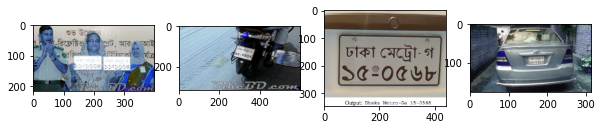

In [2]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("train/train/1.jpg")
ax[0].imshow(image)
image = cv.imread("train/train/2.jpg")
ax[1].imshow(image)
image = cv.imread("train/train/3.png")
ax[2].imshow(image)
image = cv.imread("train/train/5.jpg")
ax[3].imshow(image)
fig.show()

In [3]:
import yaml

data_yaml = dict(
    train = 'train/train',
    val = 'test/test',
    nc = 1,
    names = ['LP']
)


# Note that I am creating the file in the yolov5/data/ directory.
with open('data_LP.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [4]:
# Number Plate Detection using Yolov7

import matplotlib.pyplot as plt
import torch
import cv2
import numpy as np
import time

from torchvision import transforms
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('best.pt')
model = weigths['model']
model = model.half().to(device)
_ = model.eval()

img_path = '1.jpg'

img = cv2.imread(img_path)

# Get the frame width and height.
h,w,c = img.shape
frame_width = w
frame_height = h


orig_image = img
image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)
image = letterbox(image, (frame_width), stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))
image = image.to(device)
image = image.half()

with torch.no_grad():
    output, _ = model(image)

output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], kpt_label=True)
output = output_to_keypoint(output)
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
for idx in range(output.shape[0]):
    # plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)

    # Comment/Uncomment the following lines to show bounding boxes around persons.
    xmin, ymin = (output[idx, 2]-output[idx, 4]/2), (output[idx, 3]-output[idx, 5]/2)
    xmax, ymax = (output[idx, 2]+output[idx, 4]/2), (output[idx, 3]+output[idx, 5]/2)

    plate_roi = nimg[int(ymin):int(ymax),int(xmin):int(xmax)]
    cv2.imshow('Plate',plate_roi)

    cv2.putText(nimg, "Number Plate", (int(xmin), int(ymin)-5), cv2.FONT_HERSHEY_SIMPLEX,1, (228, 79, 215), 2)
    cv2.rectangle(
        nimg,
        (int(xmin), int(ymin)),
        (int(xmax), int(ymax)),
        color=(228, 79, 215),
        thickness=1,
        lineType=cv2.LINE_AA
    )

# Convert from BGR to RGB color format.
cv2.imwrite('result.jpg',nimg)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] The specified procedure could not be found
  warn(f"Failed to load image Python extension: {e}")


ModuleNotFoundError: No module named 'torch.ao.quantization'